<a href="https://colab.research.google.com/github/veectorh/BetaHealth.github/blob/pages/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##import the libraries required
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

In [0]:
import json

In [0]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
#My Twitter API Authentication Variables
consumer_key = 'aSh3WVjTr1ROZAhSsG8B2czcw'
consumer_secret = 'WqUe84dmC1FrGOVT4Bc6YvuUfeoMwGTB6ZOUMsgT1LRJ9wL0t6'
access_token = '1633997239-Sd0pTXDQ4VK3NJp4FhkQLic0WKJ3Aqdc18Izaij'
access_token_secret = 'fSR6u5LCGBw8ArsOic3gkDRVU72GkkbA2HGJKrTnA0SyL'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('game of thrones', count=2000)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)

,Tweets
0,RT @gluck_azunwena: NYSC band plays Game of th...
1,RT @DemetriusHarmon: winter been coming for ye...
2,RT @cwozey: happy game of thrones day friends....
3,In honor of game of thrones day here’s some th...
4,RT @FlavioArosemena: Game of Thrones is bad — ...
5,RT @ClickHole: Overstepping Her Bounds: J.K. R...
6,RT @coolcam101: Me getting ready for Game of T...
7,RT @enfystano: ITS GAME OF THRONES DAY BITCHES...
8,RT @RealLifeKaz: Tonight is going to be the fi...
9,RT @mwoz22: In 2019:\n\n1. Marvel will close o...


2019-04-14 18:13:02


In [0]:
data.count()

Tweets    83
dtype: int64

In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.DataFrame.from_dict(listy, orient='index', columns=['neg', 'neu', 'pos'])
data['polarity'] = se.values



AttributeError: ignored

In [0]:
data.polarity.count()

89

In [0]:
analysis = data.polarity

In [0]:
analysis.head()

0    {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...
1    {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: polarity, dtype: object

In [0]:
import seaborn as sns

In [0]:
type(analysis)

pandas.core.series.Series

In [0]:
sentiment = pd.DataFrame(analysis)

In [0]:
sentiment.head()

,polarity
0,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp..."
1,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp..."
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp..."
4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [0]:
new_sent = pd.DataFrame.from_dict(sentiment)

In [0]:
new_sent.head()

,polarity
0,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp..."
1,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp..."
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp..."
4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


TypeError: ignored

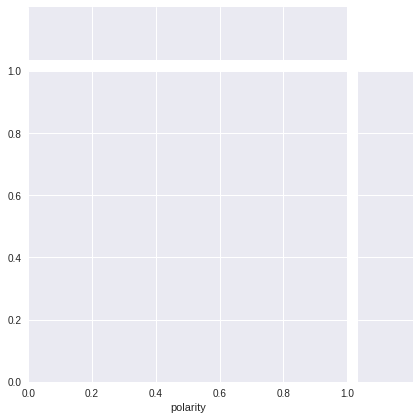

In [0]:
sns.jointplot(x = sentiment['polarity'], y = sentiment.index )